# Model Development

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

### Step 1: Load and preprocess the dataset

In [44]:
df = pd.read_csv('new_df.csv')

# Create Spending Tiers
df['SpendingTier'] = pd.qcut(df['SumExp'], q=3, labels=['low', 'medium', 'high'])

# Drop unnecessary columns
df.drop(columns=['Iu', 'Imax', 'SumExp', 'AvgExp'], axis=1, inplace=True)

# Encode the target variable
label_encoder = LabelEncoder()
df['SpendingTier'] = label_encoder.fit_transform(df['SpendingTier'])  # 'low': 0, 'medium': 1, 'high': 2

### Step 2: Split the data into features and target

In [45]:
X = df.drop(columns=['SpendingTier'])
y = df['SpendingTier']

### Step 3: Split the data into training, validation, and test sets

In [46]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [47]:
print(f"Train set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Train set size: 3389 samples
Validation set size: 1130 samples
Test set size: 1130 samples


### Step 4: Define models

In [48]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier()
}

### Step 5: Train and evaluate models without hyperparameter Tuning


Validation Performance:

Training Logistic Regression...
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

        high       0.87      0.78      0.82       376
         low       0.79      0.85      0.82       377
      medium       0.67      0.68      0.68       377

    accuracy                           0.77      1130
   macro avg       0.78      0.77      0.77      1130
weighted avg       0.78      0.77      0.77      1130



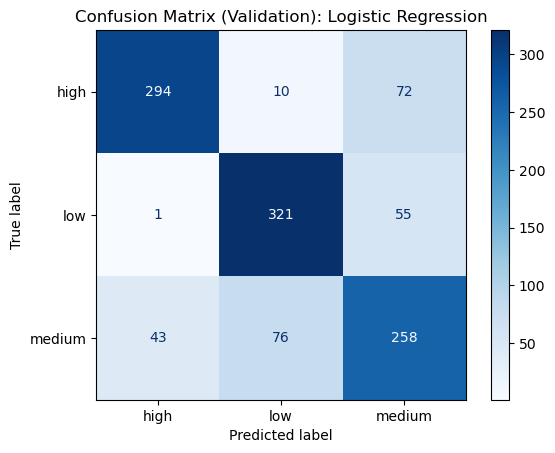


Training Random Forest...
Classification Report for Random Forest:
              precision    recall  f1-score   support

        high       0.86      0.86      0.86       376
         low       0.81      0.83      0.82       377
      medium       0.71      0.69      0.70       377

    accuracy                           0.79      1130
   macro avg       0.79      0.79      0.79      1130
weighted avg       0.79      0.79      0.79      1130



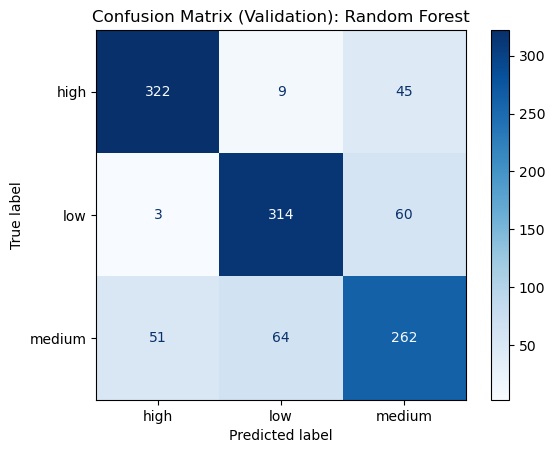


Training Gradient Boosting...
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

        high       0.87      0.84      0.85       376
         low       0.82      0.85      0.83       377
      medium       0.72      0.72      0.72       377

    accuracy                           0.80      1130
   macro avg       0.80      0.80      0.80      1130
weighted avg       0.80      0.80      0.80      1130



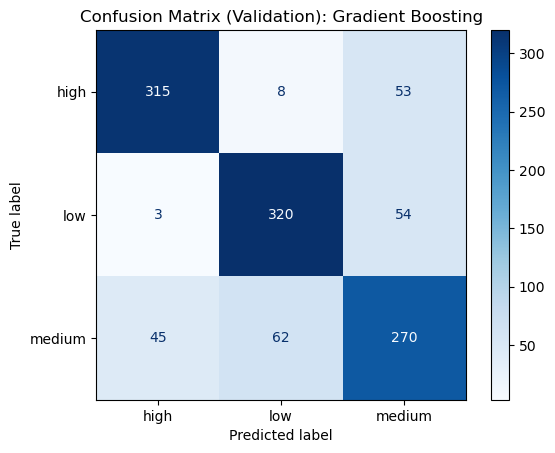


Training XGBoost...
Classification Report for XGBoost:
              precision    recall  f1-score   support

        high       0.87      0.85      0.86       376
         low       0.82      0.84      0.83       377
      medium       0.72      0.73      0.73       377

    accuracy                           0.81      1130
   macro avg       0.81      0.81      0.81      1130
weighted avg       0.81      0.81      0.81      1130



C:\Users\ravee\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:56:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


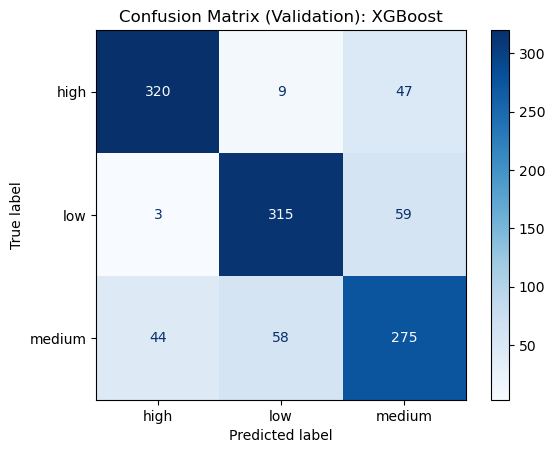


Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 3389, number of used features: 4
[LightGBM] [Info] Start training from score -1.098317
[LightGBM] [Info] Start training from score -1.098317
[LightGBM] [Info] Start training from score -1.099203
Classification Report for LightGBM:
              precision    recall  f1-score   support

        high       0.87      0.84      0.85       376
         low       0.83      0.84      0.83       377
      medium       0.71      0.72      0.72       377

    accuracy                           0.80      1130
   macro avg       0.80      0.80      0.80      1130
weighted avg       0.80      0.80      0.80      1130



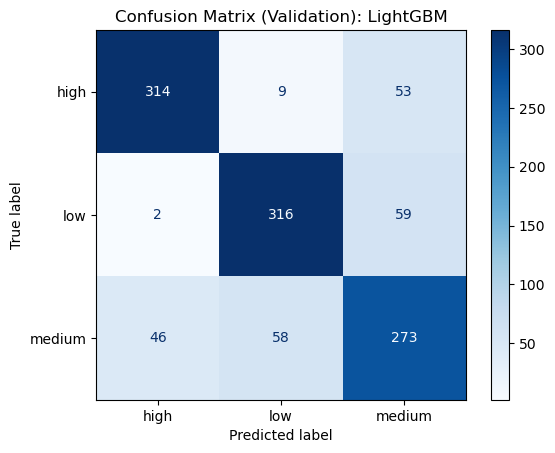

In [22]:
model_performance = {}
print("\nValidation Performance:")
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    model_performance[name] = classification_report(y_val, y_val_pred, output_dict=True)
    
    # Print classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))
    
    # Confusion matrix visualization
    cm_val = confusion_matrix(y_val, y_val_pred, labels=[0, 1, 2])
    disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=label_encoder.classes_)
    disp_val.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix (Validation): {name}")
    plt.show()

# Model Evaluation

### Step 6: Test all models


Testing all models on the test set...

Test Classification Report for Logistic Regression:
              precision    recall  f1-score   support

        high       0.88      0.76      0.81       377
         low       0.80      0.87      0.83       376
      medium       0.66      0.69      0.68       377

    accuracy                           0.77      1130
   macro avg       0.78      0.77      0.78      1130
weighted avg       0.78      0.77      0.77      1130



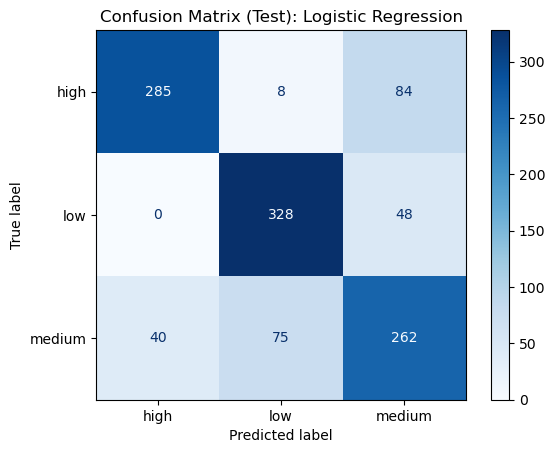


Test Classification Report for Random Forest:
              precision    recall  f1-score   support

        high       0.87      0.85      0.86       377
         low       0.85      0.82      0.84       376
      medium       0.72      0.77      0.74       377

    accuracy                           0.81      1130
   macro avg       0.82      0.81      0.81      1130
weighted avg       0.82      0.81      0.81      1130



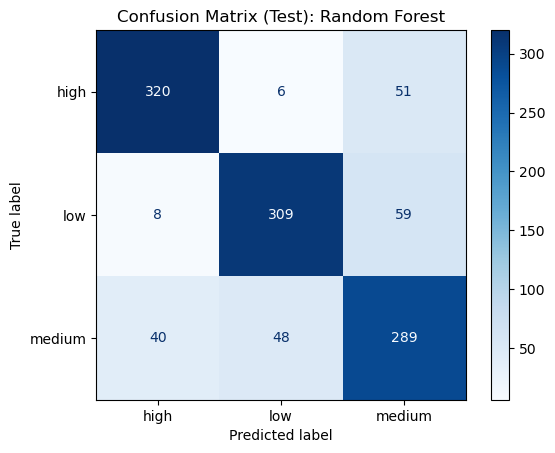


Test Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

        high       0.87      0.83      0.85       377
         low       0.85      0.85      0.85       376
      medium       0.72      0.74      0.73       377

    accuracy                           0.81      1130
   macro avg       0.81      0.81      0.81      1130
weighted avg       0.81      0.81      0.81      1130



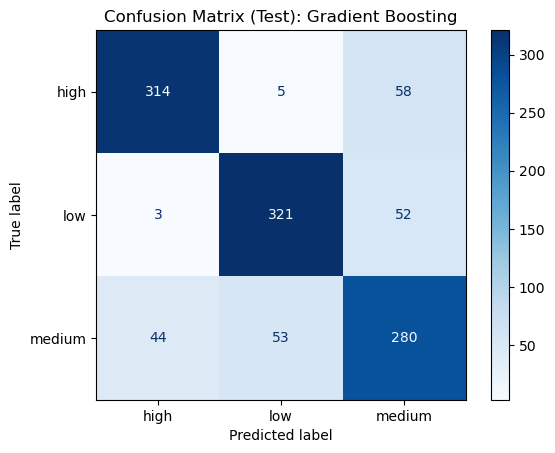


Test Classification Report for XGBoost:
              precision    recall  f1-score   support

        high       0.90      0.83      0.86       377
         low       0.83      0.83      0.83       376
      medium       0.71      0.77      0.74       377

    accuracy                           0.81      1130
   macro avg       0.81      0.81      0.81      1130
weighted avg       0.81      0.81      0.81      1130



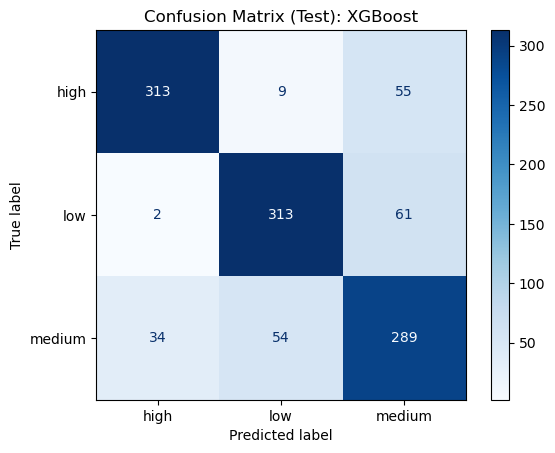


Test Classification Report for LightGBM:
              precision    recall  f1-score   support

        high       0.88      0.84      0.86       377
         low       0.84      0.85      0.84       376
      medium       0.72      0.75      0.73       377

    accuracy                           0.81      1130
   macro avg       0.81      0.81      0.81      1130
weighted avg       0.81      0.81      0.81      1130



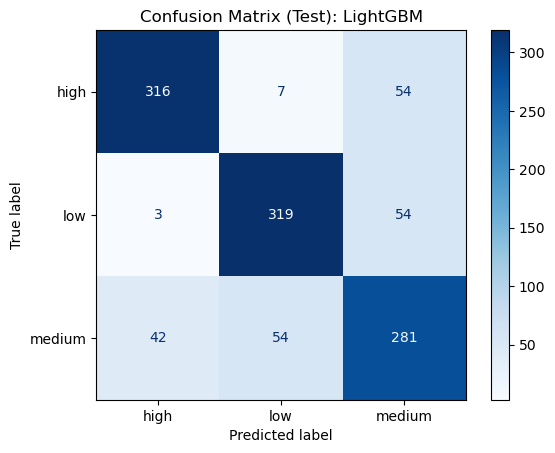


Best Performing Model:
Model: Random Forest
Metric (f1-score): 0.8134


In [23]:
best_model_name = None
best_model_score = 0
#Choose the metric to compare models ('accuracy', 'precision', 'recall', 'f1-score')
metric = 'f1-score' 

print("\nTesting all models on the test set...")
for name, model in models.items():
    y_test_pred = model.predict(X_test)
    print(f"\nTest Classification Report for {name}:")
    report = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_, output_dict=True)
    print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))
    
    # Get the average score for the chosen metric
    avg_score = report['weighted avg'][metric]
    
    # Track the best model
    if avg_score > best_model_score:
        best_model_name = name
        best_model_score = avg_score
    
    # Confusion matrix visualization for each model
    cm_test = confusion_matrix(y_test, y_test_pred, labels=[0, 1, 2])
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=label_encoder.classes_)
    disp_test.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix (Test): {name}")
    plt.show()

# Print the best-performing model
print("\nBest Performing Model:")
print(f"Model: {best_model_name}")
print(f"Metric ({metric}): {best_model_score:.4f}")


Validation Performance:

Training Logistic Regression...


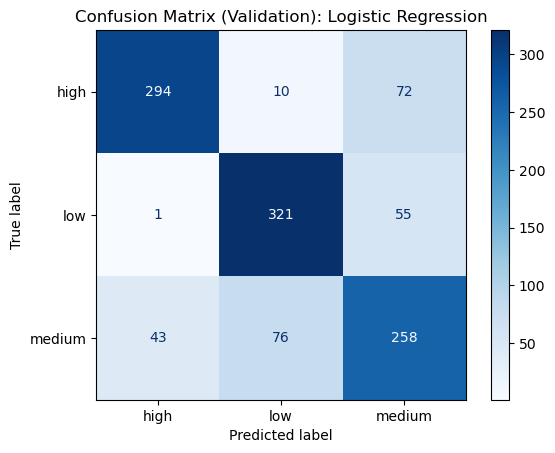


Training Random Forest...


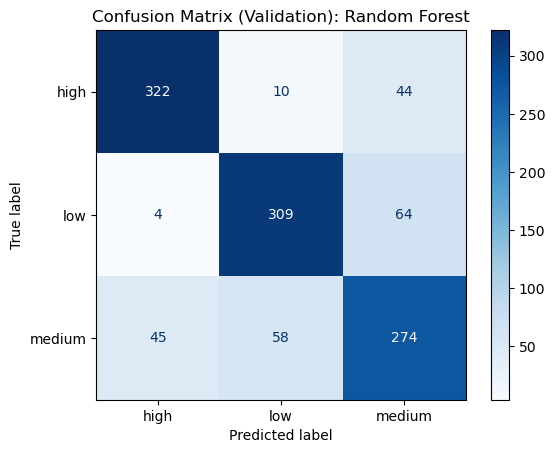


Training Gradient Boosting...


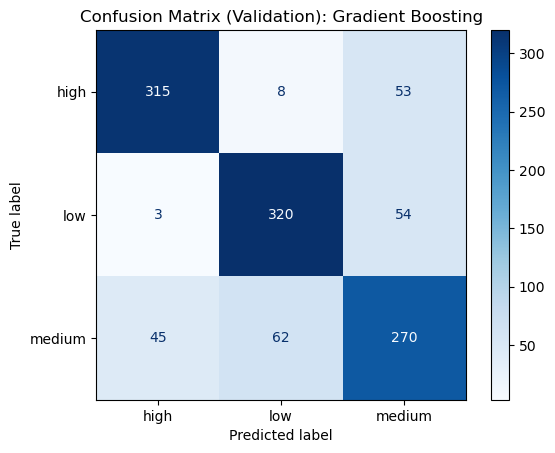


Training XGBoost...


C:\Users\ravee\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:56:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


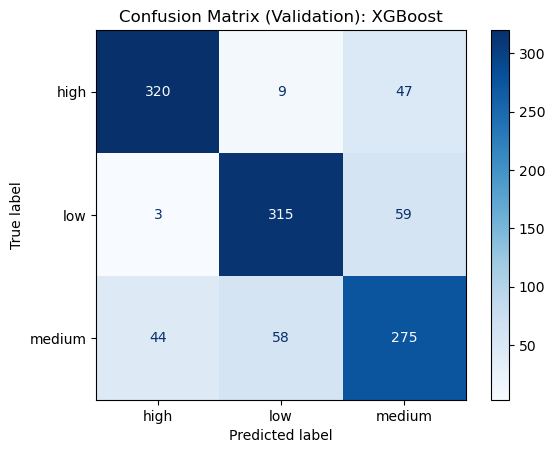


Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 3389, number of used features: 4
[LightGBM] [Info] Start training from score -1.098317
[LightGBM] [Info] Start training from score -1.098317
[LightGBM] [Info] Start training from score -1.099203


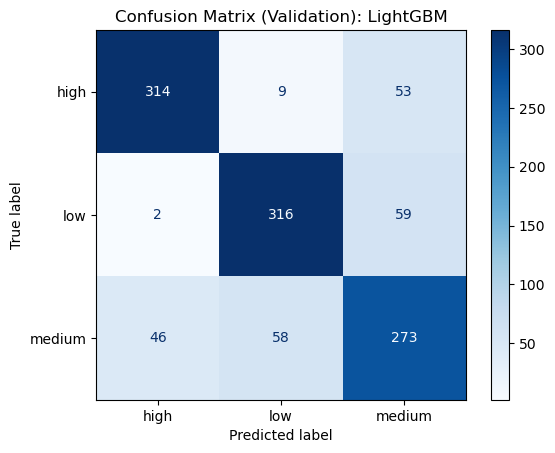


Model Performance Summary:
                 Model   Accuracy  Precision (Low)  Recall (Low)  \
0  Logistic Regression  77.256637        78.869779     85.145889   
1        Random Forest  80.088496        81.962865     81.962865   
2    Gradient Boosting  80.088496        82.051282     84.880637   
3              XGBoost  80.530973        82.460733     83.554377   
4             LightGBM  79.911504        82.506527     83.819629   

   F1-Score (Low)  Precision (Medium)  Recall (Medium)  F1-Score (Medium)  \
0       81.887755           67.012987        68.435013          67.716535   
1       81.962865           71.727749        72.679045          72.200264   
2       83.441982           71.618037        71.618037          71.618037   
3       83.003953           72.178478        72.944297          72.559367   
4       83.157895           70.909091        72.413793          71.653543   

   Precision (High)  Recall (High)  F1-Score (High)  
0         86.982249      78.191489        82.3

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Train and evaluate models
model_performance = {}
summary_table = []

print("\nValidation Performance:")
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    
    # Get classification report
    report = classification_report(y_val, y_val_pred, target_names=label_encoder.classes_, output_dict=True)
    model_performance[name] = report
    
    # Append results to summary table
    summary_table.append({
        'Model': name,
        'Accuracy': report['accuracy'] * 100,
        'Precision (Low)': report['low']['precision'] * 100,
        'Recall (Low)': report['low']['recall'] * 100,
        'F1-Score (Low)': report['low']['f1-score'] * 100,
        'Precision (Medium)': report['medium']['precision'] * 100,
        'Recall (Medium)': report['medium']['recall'] * 100,
        'F1-Score (Medium)': report['medium']['f1-score'] * 100,
        'Precision (High)': report['high']['precision'] * 100,
        'Recall (High)': report['high']['recall'] * 100,
        'F1-Score (High)': report['high']['f1-score'] * 100,
    })
    
    # Confusion matrix visualization
    cm_val = confusion_matrix(y_val, y_val_pred, labels=[0, 1, 2])
    disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=label_encoder.classes_)
    disp_val.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix (Validation): {name}")
    plt.show()

# Create a DataFrame for the summary table
performance_df = pd.DataFrame(summary_table)

# Display the summary table
print("\nModel Performance Summary:")
print(performance_df)


### Cross-Validation

In [25]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted')
    print(f"Cross-Validation F1-Score for {name}: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


Cross-Validation F1-Score for Logistic Regression: 0.7765 ± 0.0125
Cross-Validation F1-Score for Random Forest: 0.7912 ± 0.0140
Cross-Validation F1-Score for Gradient Boosting: 0.7995 ± 0.0057


C:\Users\ravee\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:57:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ravee\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:57:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ravee\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:57:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ravee\anaconda3\Lib\site-packages\

Cross-Validation F1-Score for XGBoost: 0.7970 ± 0.0025
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 2711, number of used features: 4
[LightGBM] [Info] Start training from score -1.098243
[LightGBM] [Info] Start training from score -1.098243
[LightGBM] [Info] Start training from score -1.099350
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 2711, number of used features: 4
[LightGBM] [Info] Start training from score -1.098243
[LightGBM] [Info] Start training from score -1.098243
[LightGBM] [Info] Start training from score -1.099350
[LightGBM] [Info] Auto-choosing col-wise multi-th

### ROC-AUC (Receiver Operating Characteristic - Area Under Curve)

In [26]:
from sklearn.metrics import roc_auc_score

for name, model in models.items():
    if hasattr(model, "predict_proba"):  # Only for models with probability prediction
        y_val_proba = model.predict_proba(X_val)
        roc_auc = roc_auc_score(y_val, y_val_proba, multi_class='ovr', average='macro')
        print(f"ROC-AUC Score for {name}: {roc_auc:.4f}")


ROC-AUC Score for Logistic Regression: 0.9099
ROC-AUC Score for Random Forest: 0.9332
ROC-AUC Score for Gradient Boosting: 0.9367
ROC-AUC Score for XGBoost: 0.9346
ROC-AUC Score for LightGBM: 0.9337


### Precision-Recall Curve

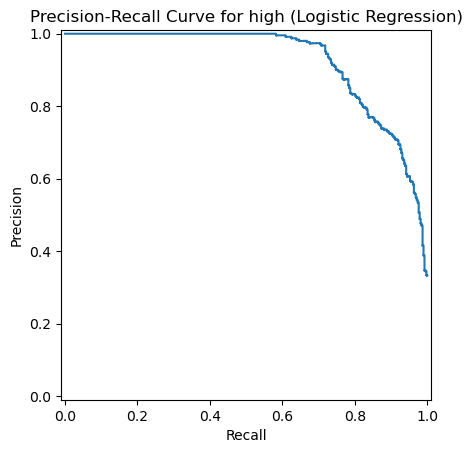

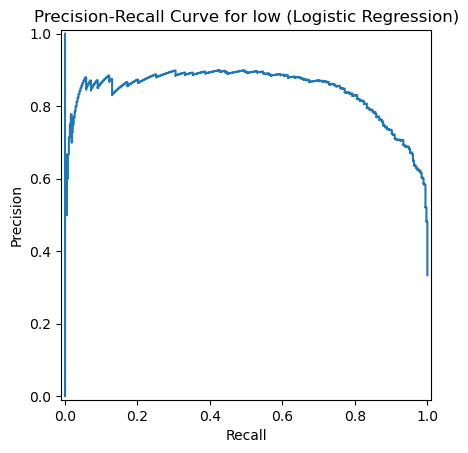

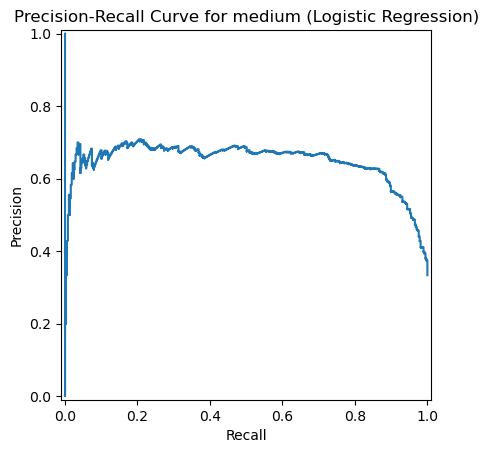

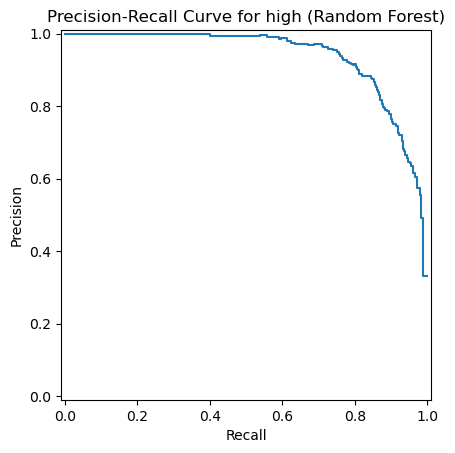

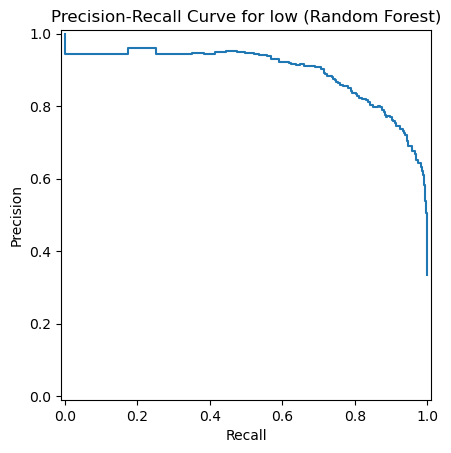

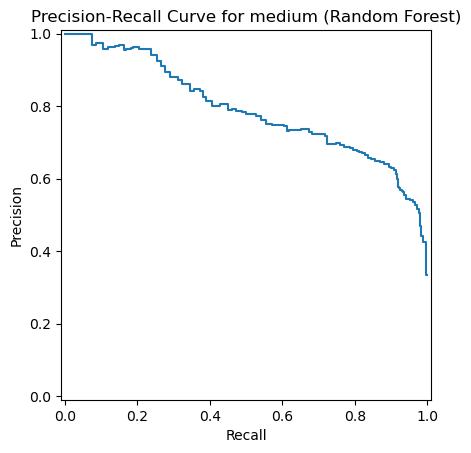

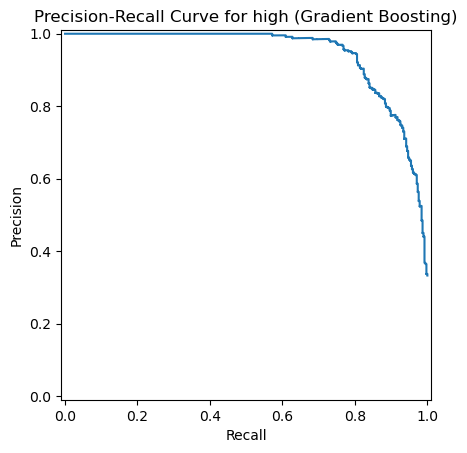

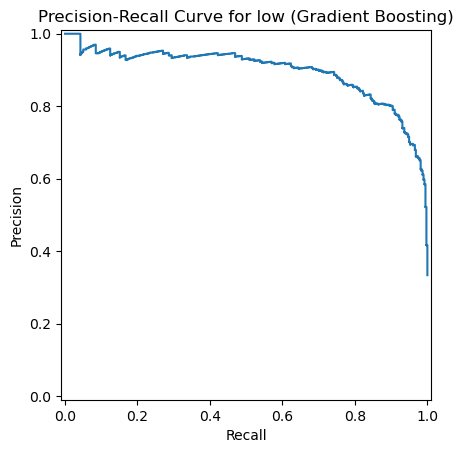

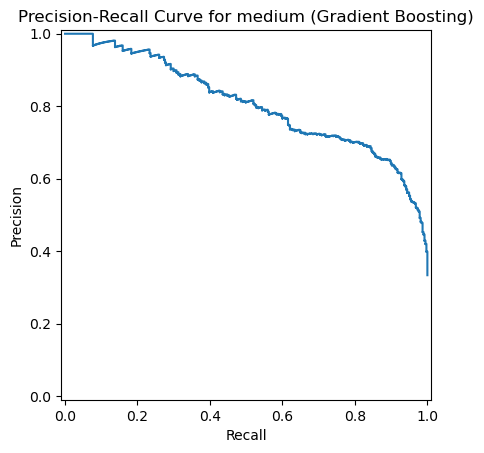

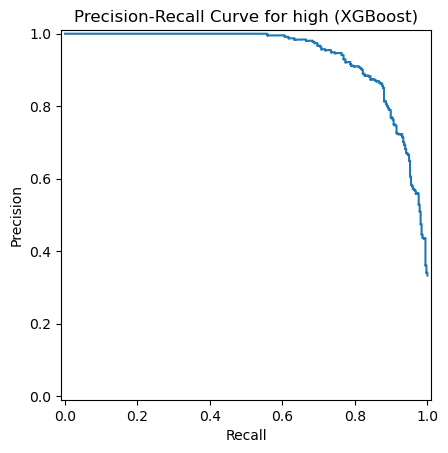

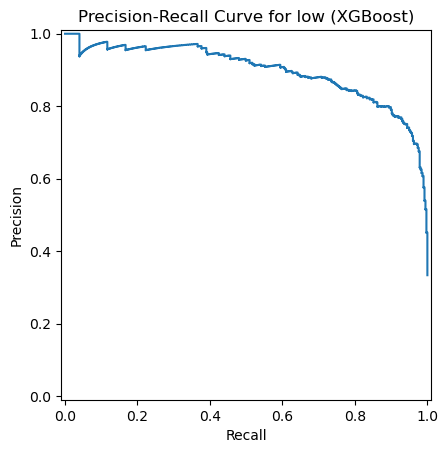

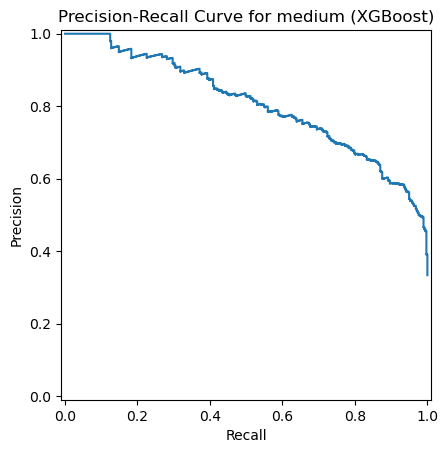

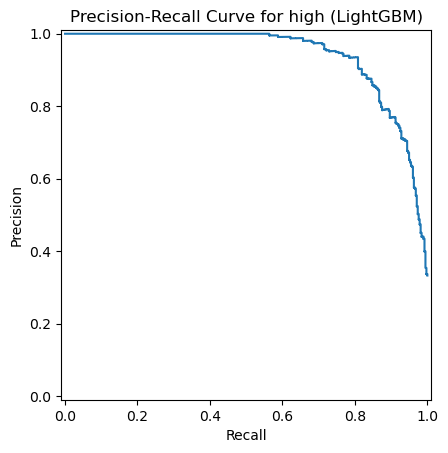

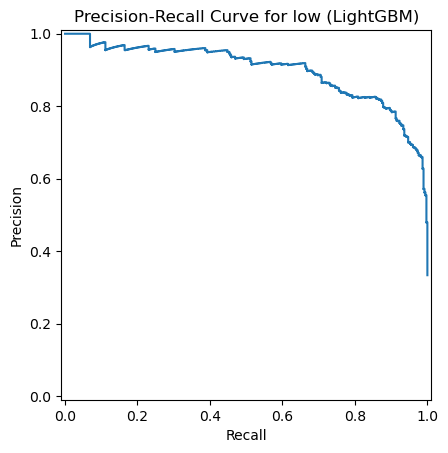

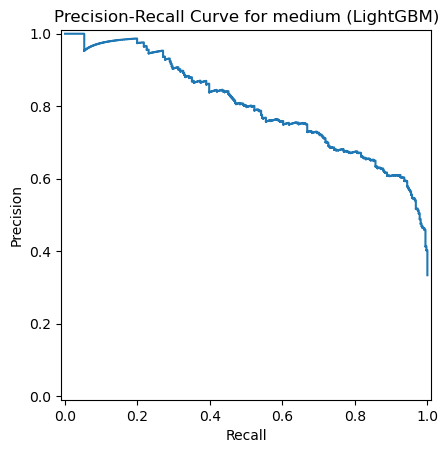

In [27]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_val_proba = model.predict_proba(X_val)
        for i, class_name in enumerate(label_encoder.classes_):
            precision, recall, _ = precision_recall_curve(y_val == i, y_val_proba[:, i])
            PrecisionRecallDisplay(precision=precision, recall=recall).plot()
            plt.title(f"Precision-Recall Curve for {class_name} ({name})")
            plt.show()


### Log Loss

In [28]:
from sklearn.metrics import log_loss

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_val_proba = model.predict_proba(X_val)
        loss = log_loss(y_val, y_val_proba)
        print(f"Log Loss for {name}: {loss:.4f}")


Log Loss for Logistic Regression: 0.5378
Log Loss for Random Forest: 0.6334
Log Loss for Gradient Boosting: 0.4611
Log Loss for XGBoost: 0.5018
Log Loss for LightGBM: 0.4907


### Cohen's Kappa

In [29]:
from sklearn.metrics import cohen_kappa_score

for name, model in models.items():
    y_val_pred = model.predict(X_val)
    kappa = cohen_kappa_score(y_val, y_val_pred)
    print(f"Cohen's Kappa for {name}: {kappa:.4f}")


Cohen's Kappa for Logistic Regression: 0.6588
Cohen's Kappa for Random Forest: 0.7013
Cohen's Kappa for Gradient Boosting: 0.7013
Cohen's Kappa for XGBoost: 0.7080
Cohen's Kappa for LightGBM: 0.6987


### Model Training Time

In [30]:
import time

training_times = {}
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_times[name] = end_time - start_time
    print(f"Training Time for {name}: {training_times[name]:.2f} seconds")


Training Time for Logistic Regression: 0.01 seconds
Training Time for Random Forest: 0.58 seconds
Training Time for Gradient Boosting: 1.52 seconds
Training Time for XGBoost: 0.14 seconds
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 3389, number of used features: 4
[LightGBM] [Info] Start training from score -1.098317
[LightGBM] [Info] Start training from score -1.098317
[LightGBM] [Info] Start training from score -1.099203


C:\Users\ravee\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:57:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Time for LightGBM: 0.17 seconds


### Calibration Curve

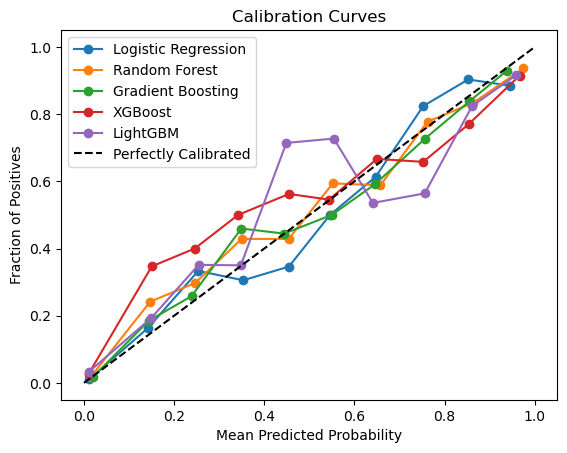

In [31]:
from sklearn.calibration import calibration_curve

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_val_proba = model.predict_proba(X_val)[:, 1]  # Use probabilities for one class
        prob_true, prob_pred = calibration_curve(y_val == 1, y_val_proba, n_bins=10)
        plt.plot(prob_pred, prob_true, marker='o', label=name)
        
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.legend()
plt.title("Calibration Curves")
plt.show()


# Model Tuning

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Define models and hyperparameter grids for tuning
param_grids = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=500),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l2'],
            'solver': ['liblinear', 'saga']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'learning_rate': [0.01, 0.1, 0.2],
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(eval_metric='mlogloss', use_label_encoder=False),
        'params': {
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5, 7],
            'n_estimators': [100, 200],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(),
        'params': {
            'learning_rate': [0.01, 0.1],
            'num_leaves': [31, 50],
            'max_depth': [-1, 5, 10],
            'feature_fraction': [0.8, 1.0]
        }
    },
}

# Model tuning using GridSearchCV
best_models = {}
for name, config in param_grids.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(config['model'], config['params'], cv=5, scoring='f1_weighted')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print()

Tuning Logistic Regression...
Best Parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}

Tuning Random Forest...
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Tuning Gradient Boosting...
Best Parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}

Tuning XGBoost...


C:\Users\ravee\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:31:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ravee\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:31:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ravee\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:31:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ravee\anaconda3\Lib\site-packages\

Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

Tuning LightGBM...
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 2711, number of used features: 4
[LightGBM] [Info] Start training from score -1.098243
[LightGBM] [Info] Start training from score -1.098243
[LightGBM] [Info] Start training from score -1.099350
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature

Validation Results for Logistic Regression:
              precision    recall  f1-score   support

        high       0.86      0.78      0.82       376
         low       0.79      0.84      0.81       377
      medium       0.66      0.68      0.67       377

    accuracy                           0.77      1130
   macro avg       0.77      0.77      0.77      1130
weighted avg       0.77      0.77      0.77      1130



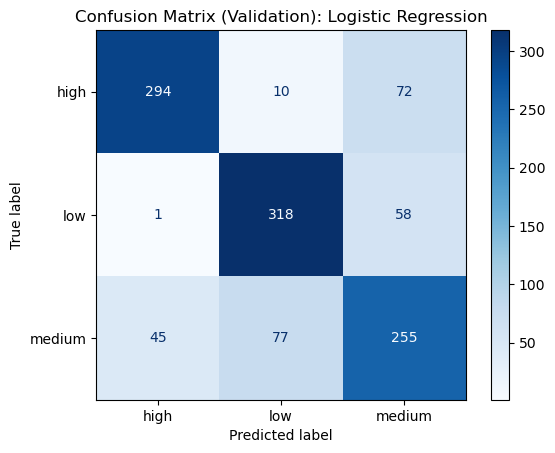

Validation Results for Random Forest:
              precision    recall  f1-score   support

        high       0.87      0.85      0.86       376
         low       0.81      0.83      0.82       377
      medium       0.71      0.71      0.71       377

    accuracy                           0.80      1130
   macro avg       0.80      0.80      0.80      1130
weighted avg       0.80      0.80      0.80      1130



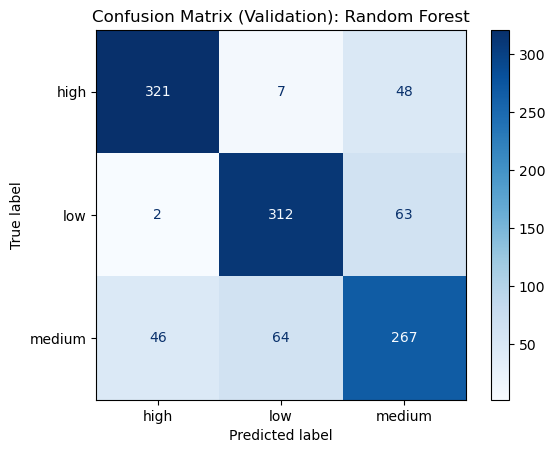

Validation Results for Gradient Boosting:
              precision    recall  f1-score   support

        high       0.88      0.84      0.86       376
         low       0.84      0.85      0.84       377
      medium       0.72      0.75      0.74       377

    accuracy                           0.81      1130
   macro avg       0.81      0.81      0.81      1130
weighted avg       0.81      0.81      0.81      1130



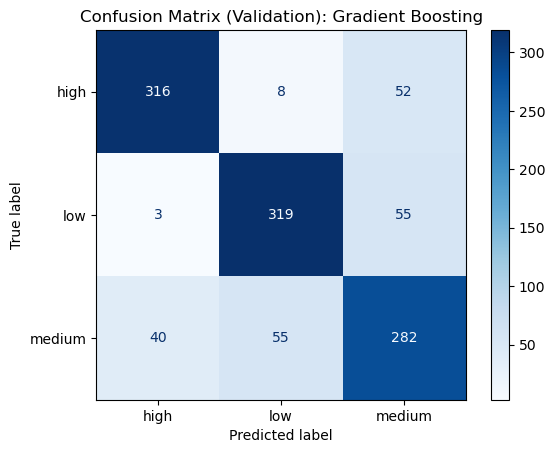

Validation Results for XGBoost:
              precision    recall  f1-score   support

        high       0.88      0.83      0.85       376
         low       0.83      0.84      0.83       377
      medium       0.71      0.74      0.72       377

    accuracy                           0.80      1130
   macro avg       0.81      0.80      0.80      1130
weighted avg       0.81      0.80      0.80      1130



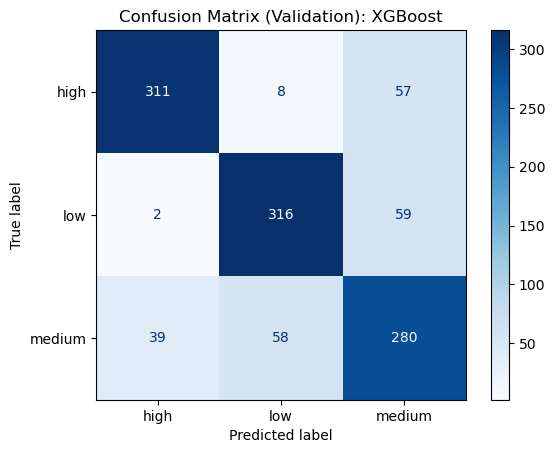

Validation Results for LightGBM:
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
              precision    recall  f1-score   support

        high       0.87      0.84      0.85       376
         low       0.82      0.84      0.83       377
      medium       0.71      0.72      0.72       377

    accuracy                           0.80      1130
   macro avg       0.80      0.80      0.80      1130
weighted avg       0.80      0.80      0.80      1130



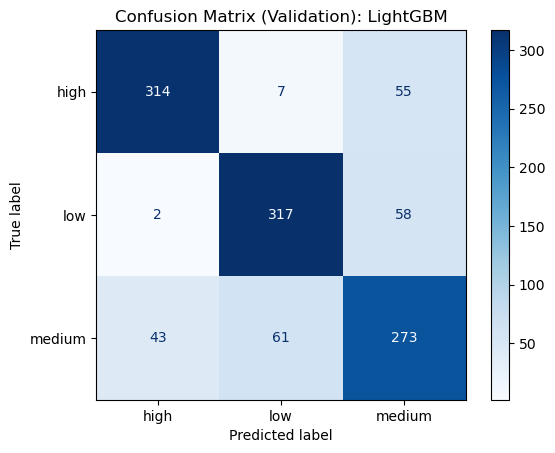

In [54]:
# Evaluate tuned models on validation data
for name, model in best_models.items():
    print(f"Validation Results for {name}:")
    y_val_pred = model.predict(X_val)
    print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))
    cm_val = confusion_matrix(y_val, y_val_pred, labels=[0, 1, 2])
    disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=label_encoder.classes_)
    disp_val.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix (Validation): {name}")
    plt.show()

Test Results for Logistic Regression:
              precision    recall  f1-score   support

        high       0.87      0.75      0.81       377
         low       0.80      0.87      0.83       376
      medium       0.66      0.69      0.67       377

    accuracy                           0.77      1130
   macro avg       0.78      0.77      0.77      1130
weighted avg       0.78      0.77      0.77      1130



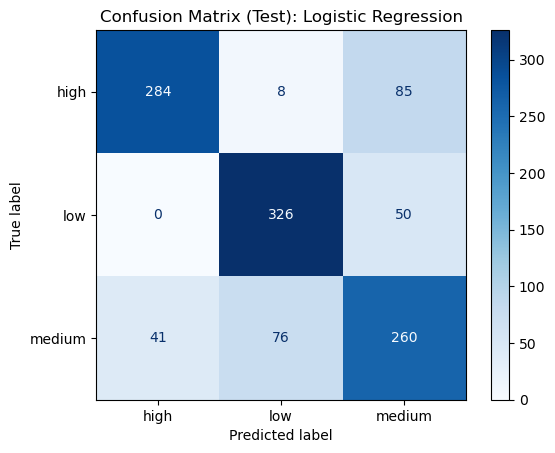

Test Results for Random Forest:
              precision    recall  f1-score   support

        high       0.88      0.84      0.86       377
         low       0.85      0.86      0.85       376
      medium       0.74      0.77      0.75       377

    accuracy                           0.82      1130
   macro avg       0.82      0.82      0.82      1130
weighted avg       0.82      0.82      0.82      1130



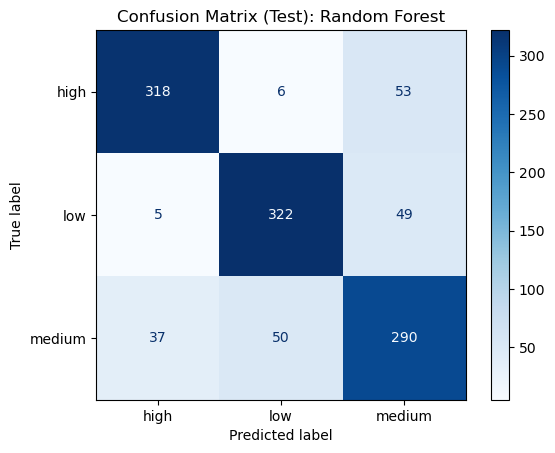

Test Results for Gradient Boosting:
              precision    recall  f1-score   support

        high       0.87      0.84      0.86       377
         low       0.84      0.85      0.85       376
      medium       0.72      0.74      0.73       377

    accuracy                           0.81      1130
   macro avg       0.81      0.81      0.81      1130
weighted avg       0.81      0.81      0.81      1130



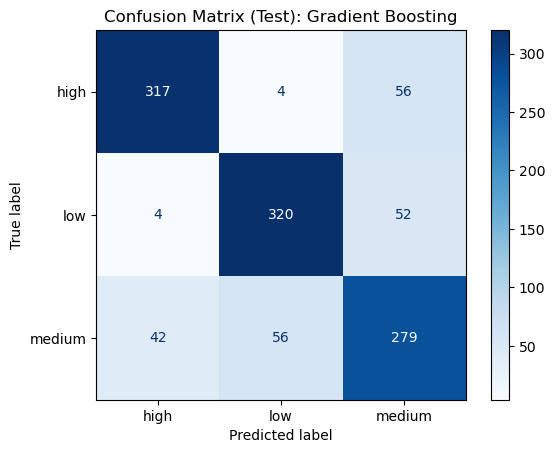

Test Results for XGBoost:
              precision    recall  f1-score   support

        high       0.88      0.84      0.86       377
         low       0.85      0.85      0.85       376
      medium       0.73      0.76      0.74       377

    accuracy                           0.82      1130
   macro avg       0.82      0.82      0.82      1130
weighted avg       0.82      0.82      0.82      1130



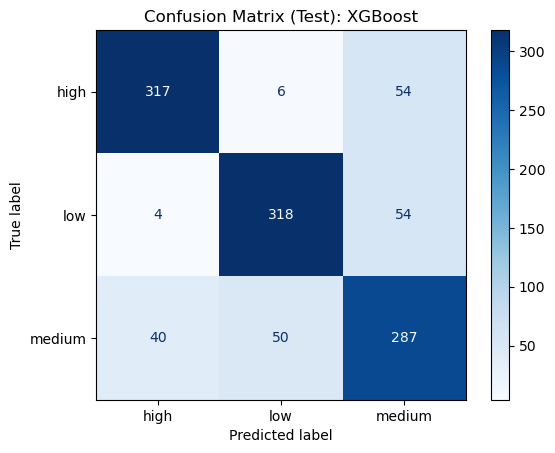

Test Results for LightGBM:
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
              precision    recall  f1-score   support

        high       0.88      0.85      0.86       377
         low       0.83      0.85      0.84       376
      medium       0.73      0.75      0.74       377

    accuracy                           0.81      1130
   macro avg       0.82      0.81      0.81      1130
weighted avg       0.82      0.81      0.81      1130



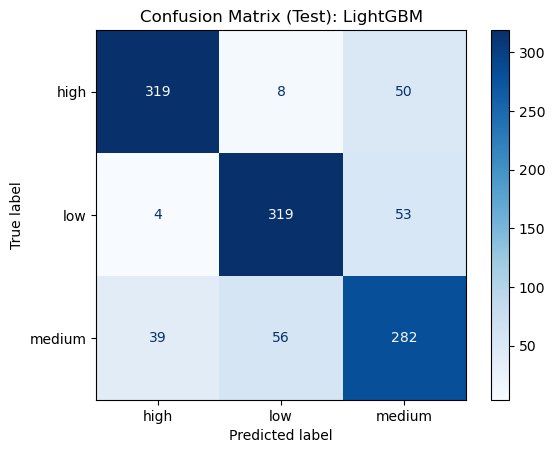

              Model  Accuracy (%)  Precision (Low) (%)  Recall (Low) (%)  F1-Score (Low) (%)  Precision (Medium) (%)  Recall (Medium) (%)  F1-Score (Medium) (%)  Precision (High) (%)  Recall (High) (%)  F1-Score (High) (%)  Weighted F1-Score (%)
Logistic Regression     76.991150            79.512195         86.702128           82.951654               65.822785            68.965517              67.357513             87.384615          75.331565            80.911681              77.068414
      Random Forest     82.300885            85.185185         85.638298           85.411141               73.979592            76.923077              75.422627             88.333333          84.350133            86.295794              82.373835
  Gradient Boosting     81.061947            84.210526         85.106383           84.656085               72.093023            74.005305              73.036649             87.327824          84.084881            85.675676              81.119676
            XGBo

In [55]:
# Evaluate best models on test data and collect metrics
test_metrics = []
for name, model in best_models.items():
    print(f"Test Results for {name}:")
    y_test_pred = model.predict(X_test)
    report = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_, output_dict=True)
    print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm_test = confusion_matrix(y_test, y_test_pred, labels=label_encoder.transform(label_encoder.classes_))
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=label_encoder.classes_)
    disp_test.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix (Test): {name}")
    plt.show()

    # Extract metrics
    test_metrics.append({
        'Model': name,
        'Accuracy (%)': report['accuracy'] * 100,
        'Precision (Low) (%)': report['low']['precision'] * 100,
        'Recall (Low) (%)': report['low']['recall'] * 100,
        'F1-Score (Low) (%)': report['low']['f1-score'] * 100,
        'Precision (Medium) (%)': report['medium']['precision'] * 100,
        'Recall (Medium) (%)': report['medium']['recall'] * 100,
        'F1-Score (Medium) (%)': report['medium']['f1-score'] * 100,
        'Precision (High) (%)': report['high']['precision'] * 100,
        'Recall (High) (%)': report['high']['recall'] * 100,
        'F1-Score (High) (%)': report['high']['f1-score'] * 100,
        'Weighted F1-Score (%)': report['weighted avg']['f1-score'] * 100
    })

# Convert metrics to DataFrame and display
metrics_df = pd.DataFrame(test_metrics)
print(metrics_df.to_string(index=False))

# Optionally, save the table to a CSV file
metrics_df.to_csv("model_evaluation_test_metrics.csv", index=False)

Fitting model: Logistic Regression
Fitting model: Random Forest
Fitting model: Gradient Boosting
Fitting model: XGBoost
Fitting model: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 3389, number of used features: 4
[LightGBM] [Info] Start training from score -1.098317
[LightGBM] [Info] Start training from score -1.098317
[LightGBM] [Info] Start training from score -1.099203


C:\Users\ravee\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:45:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


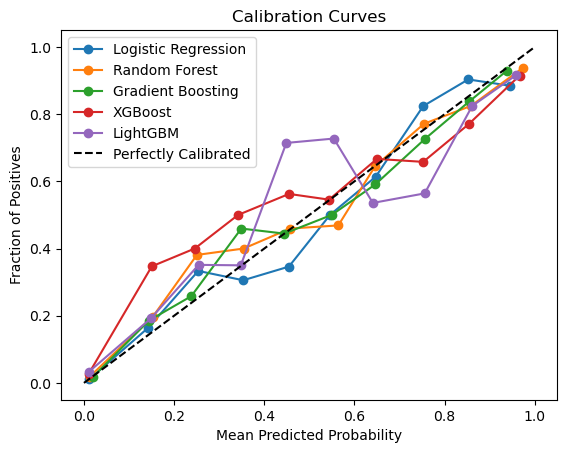

In [58]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
from sklearn.exceptions import NotFittedError

for name, model in models.items():
    try:
        if hasattr(model, "predict_proba"):
            # Fit the model if not already fitted
            if not hasattr(model, "classes_"):
                print(f"Fitting model: {name}")
                model.fit(X_train, y_train)
            
            # Get probabilities for the positive class (class label 1)
            y_val_proba = model.predict_proba(X_val)[:, 1]
            prob_true, prob_pred = calibration_curve(y_val == 1, y_val_proba, n_bins=10)
            
            # Plot calibration curve
            plt.plot(prob_pred, prob_true, marker='o', label=name)
    except NotFittedError as e:
        print(f"Model '{name}' is not fitted. Please ensure all models are trained.")
        continue

# Plot a perfectly calibrated reference line
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')

# Add plot labels and legend
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.legend()
plt.title("Calibration Curves")
plt.show()


In [59]:
from sklearn.metrics import roc_auc_score

for name, model in models.items():
    if hasattr(model, "predict_proba"):  # Only for models with probability prediction
        y_val_proba = model.predict_proba(X_val)
        roc_auc = roc_auc_score(y_val, y_val_proba, multi_class='ovr', average='macro')
        print(f"ROC-AUC Score for {name}: {roc_auc:.4f}")


ROC-AUC Score for Logistic Regression: 0.9099
ROC-AUC Score for Random Forest: 0.9320
ROC-AUC Score for Gradient Boosting: 0.9368
ROC-AUC Score for XGBoost: 0.9346
ROC-AUC Score for LightGBM: 0.9337


In [60]:
from sklearn.metrics import log_loss

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_val_proba = model.predict_proba(X_val)
        loss = log_loss(y_val, y_val_proba)
        print(f"Log Loss for {name}: {loss:.4f}")

Log Loss for Logistic Regression: 0.5378
Log Loss for Random Forest: 0.6656
Log Loss for Gradient Boosting: 0.4610
Log Loss for XGBoost: 0.5018
Log Loss for LightGBM: 0.4907


In [61]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted')
    print(f"Cross-Validation F1-Score for {name}: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

Cross-Validation F1-Score for Logistic Regression: 0.7765 ± 0.0125
Cross-Validation F1-Score for Random Forest: 0.7941 ± 0.0090
Cross-Validation F1-Score for Gradient Boosting: 0.7995 ± 0.0057


C:\Users\ravee\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:46:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ravee\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:46:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ravee\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:46:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ravee\anaconda3\Lib\site-packages\

Cross-Validation F1-Score for XGBoost: 0.7970 ± 0.0025
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 2711, number of used features: 4
[LightGBM] [Info] Start training from score -1.098243
[LightGBM] [Info] Start training from score -1.098243
[LightGBM] [Info] Start training from score -1.099350
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 2711, number of used features: 4
[LightGBM] [Info] Start training from score -1.098243
[LightGBM] [Info] Start training from score -1.098243
[LightGBM] [Info] Start training from score -1.099350
[LightGBM] [Info] Auto-choosing col-wise multi-th

In [62]:
import time

training_times = {}
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_times[name] = end_time - start_time
    print(f"Training Time for {name}: {training_times[name]:.2f} seconds")


Training Time for Logistic Regression: 0.01 seconds
Training Time for Random Forest: 0.62 seconds
Training Time for Gradient Boosting: 1.69 seconds


C:\Users\ravee\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:46:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Time for XGBoost: 0.22 seconds
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 3389, number of used features: 4
[LightGBM] [Info] Start training from score -1.098317
[LightGBM] [Info] Start training from score -1.098317
[LightGBM] [Info] Start training from score -1.099203
Training Time for LightGBM: 0.15 seconds


In [63]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('new_df.csv')

# Prepare the data
X = df.drop(columns=['SumExp'])  # Exclude the target variable
y = df['SumExp']  # Target variable (total expenditure)

# Create bins for stratification
y_bins = pd.qcut(y, q=10, duplicates='drop', labels=False)

# First split: Train (60%) and Temp (40%)
X_train, X_temp, y_train, y_temp, bins_train, bins_temp = train_test_split(
    X, y, y_bins, test_size=0.4, random_state=42, stratify=y_bins
)

# Second split: Validation (20%) and Test (20%) from Temp
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=bins_temp
)

# Train a CatBoost Regressor
catboost_regressor = CatBoostRegressor(
    iterations=500,          # Number of boosting iterations
    learning_rate=0.1,       # Learning rate
    depth=6,                 # Depth of the tree
    random_seed=42,          # For reproducibility
    verbose=100              # Verbosity level
)
catboost_regressor.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

# Make predictions on the validation set
y_val_pred = catboost_regressor.predict(X_val)

# Evaluate on the validation set
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_val_pred)

# Make predictions on the test set
y_test_pred = catboost_regressor.predict(X_test)

# Evaluate on the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# Display evaluation metrics
print("CatBoost Regressor Evaluation on Validation Set:")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Mean Squared Error (MSE): {mse_val:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")
print(f"R-squared (R2 Score): {r2_val:.2f}")

print("\nCatBoost Regressor Evaluation on Test Set:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R2 Score): {r2_test:.2f}")


0:	learn: 3198.7896636	test: 2938.2903599	best: 2938.2903599 (0)	total: 3.77ms	remaining: 1.88s
100:	learn: 165.2681217	test: 413.4610031	best: 413.4610031 (100)	total: 389ms	remaining: 1.53s
200:	learn: 95.6284384	test: 384.3015685	best: 384.1395898 (193)	total: 827ms	remaining: 1.23s
300:	learn: 66.5121947	test: 377.7809217	best: 377.3949560 (299)	total: 1.3s	remaining: 860ms
400:	learn: 50.4735764	test: 375.7177264	best: 375.5535896 (389)	total: 1.74s	remaining: 429ms
499:	learn: 41.7182801	test: 374.8014283	best: 374.6521547 (491)	total: 2.17s	remaining: 0us

bestTest = 374.6521547
bestIteration = 491

Shrink model to first 492 iterations.
CatBoost Regressor Evaluation on Validation Set:
Mean Absolute Error (MAE): 70.62
Mean Squared Error (MSE): 140364.24
Root Mean Squared Error (RMSE): 374.65
R-squared (R2 Score): 0.99

CatBoost Regressor Evaluation on Test Set:
Mean Absolute Error (MAE): 73.11
Mean Squared Error (MSE): 106605.04
Root Mean Squared Error (RMSE): 326.50
R-squared (R

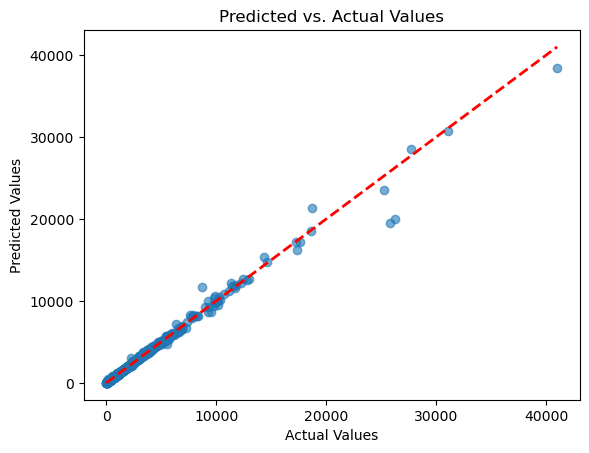

In [65]:
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()
